# Density-based spatial clustering of applications with noise (DBSCAN)

DBSCAN focuses on the density of the data points to form clusters.

DBSCAN iterates through points and uses two key parameters until all points have been classified: *epsilon* and *Minimum Number of Points (MinPts)*.

Epsilon is the maximum distance between two points for one to be considered as in the neighborhood of the other. MinPts is the minimum number of points required to form a dense region.

DBSCAN works by classifying each point as a *core point*, *border point*, or *noise point*.

## Point classification

### Core point

Core points are points with MinPts within the epsilon range, **including** the point itself.

### Border points

Border points are in epsilon range of a core point but do not contain MinPts within the epsilon range (otherwise, they would be classified as core points).

### Noise points

Noise points are points that are neither core points nor border points with the given hyperparameters.


### Hyperparameters and their impact

**Epsilon**:
- *Increasing* epsilon results in more points to be classified as core points and border points, while less points are classified as noise points.
- *Decreasing* epsilon will create more unique clusters, as more points will be classified as noise points.

**MinPts**:
- *Increasing* MinPts will result in fewer core points and more noise points.

### Finding optimal hyperparameters

**Epsilon**

*Elbow method*: run multiple DBSCAN models and measure

- The number of clusters
- The number of noise points
- The percentage of noise points

Plotting these metrics can help identify the optimal epsilon value: the point where the number of clusters stabilizes and the number of noise points is minimized.

**MinPts**

- MinPts is typically set to the number of features in the dataset plus one
- MinPts can be optimized using the elbow method, similar to epsilon


## DBSCAN with Python

### Example 01 - DBSCAN

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
blobs = pd.read_csv('./data/cluster-blobs.csv')

In [158]:
blobs

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


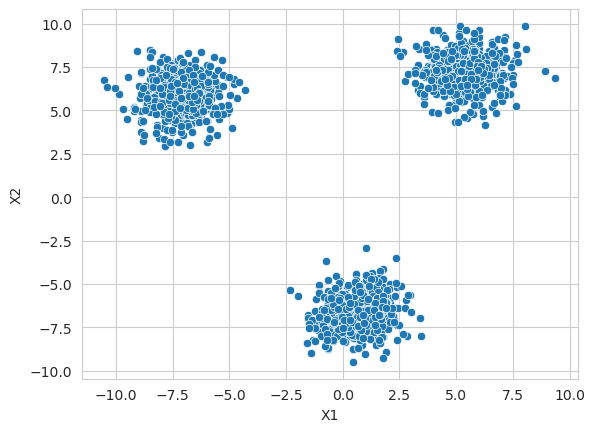

In [159]:
sns.scatterplot(data=blobs,x='X1',y='X2')
plt.show()

In [160]:
moons = pd.read_csv('./data/cluster-moons.csv')

In [161]:
moons

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


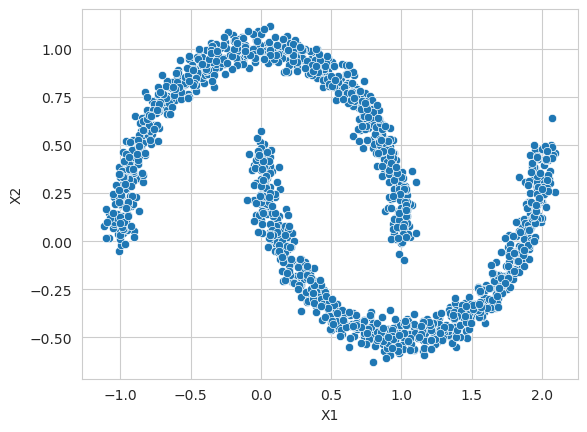

In [162]:
sns.scatterplot(data=moons,x='X1',y='X2')
plt.show()

In [163]:
circles = pd.read_csv('./data/cluster-circles.csv')

In [164]:
circles

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354
...,...,...
1495,-0.297506,0.077834
1496,0.082555,-0.270371
1497,0.279533,-0.109435
1498,0.027432,-0.264891


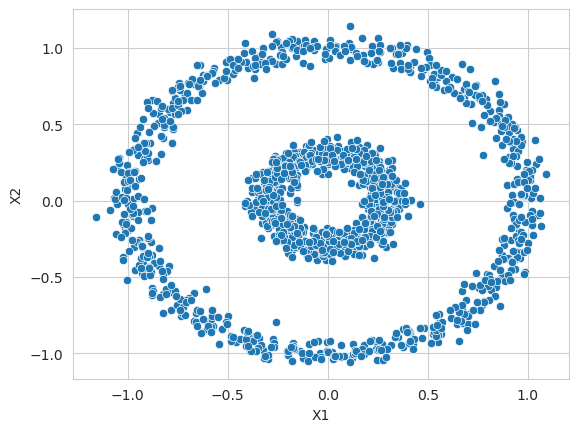

In [165]:
sns.scatterplot(data=circles,x='X1',y='X2')
plt.show()

#### Comparing KMeans and DBSCAN

In [166]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels, palette='Set1')
    plt.show()

In [167]:
from sklearn.cluster import KMeans, DBSCAN

##### Blobs dataset

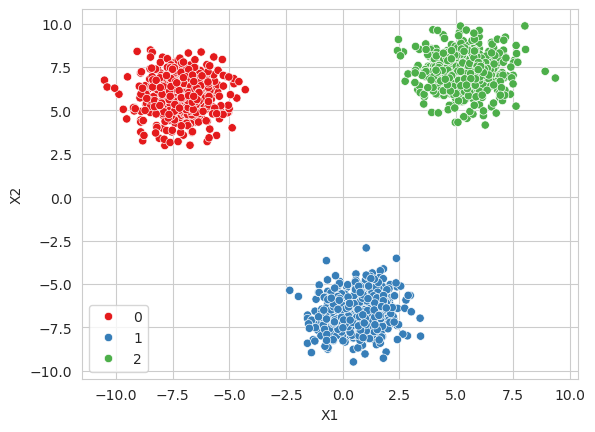

In [168]:
model = KMeans(n_clusters=3)
display_categories(model,blobs)

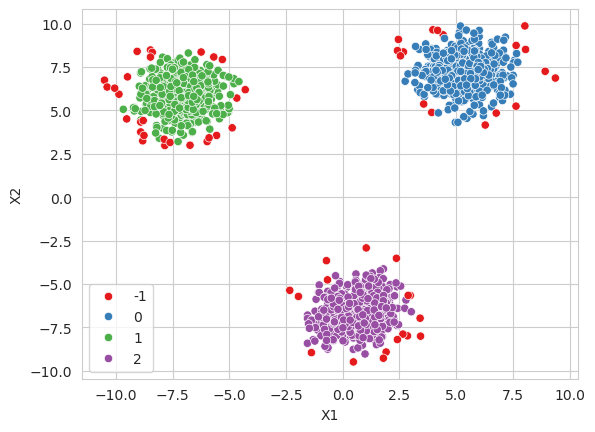

In [169]:
model = DBSCAN()
display_categories(model,blobs)

##### Moons dataset

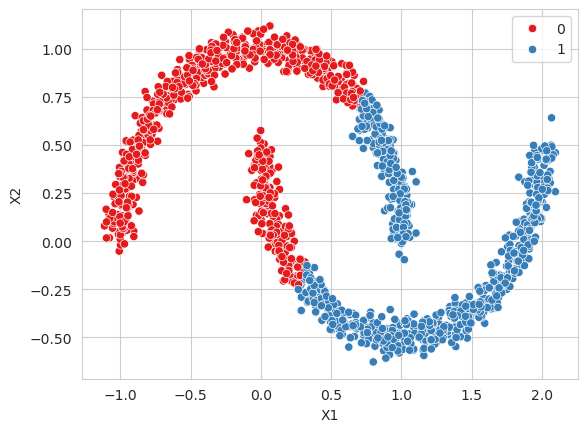

In [170]:
model = KMeans(n_clusters=2)
display_categories(model,moons)

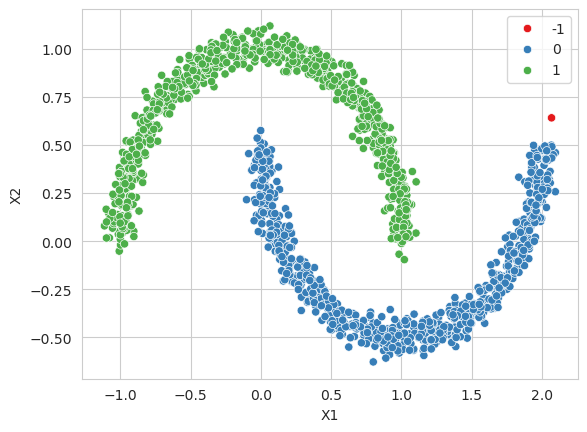

In [171]:
model = DBSCAN(eps=0.1)
display_categories(model,moons)

##### Circles dataset

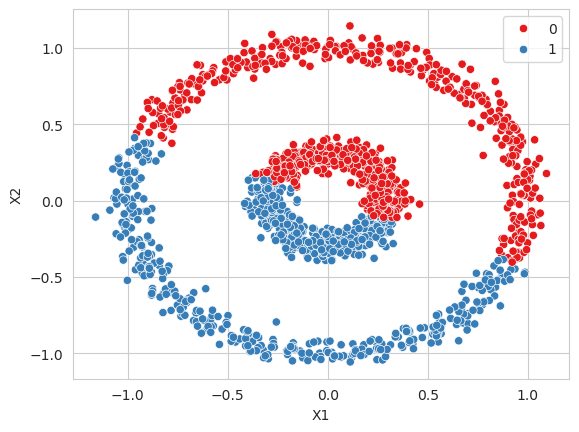

In [172]:
model = KMeans(n_clusters=2)
display_categories(model,circles)

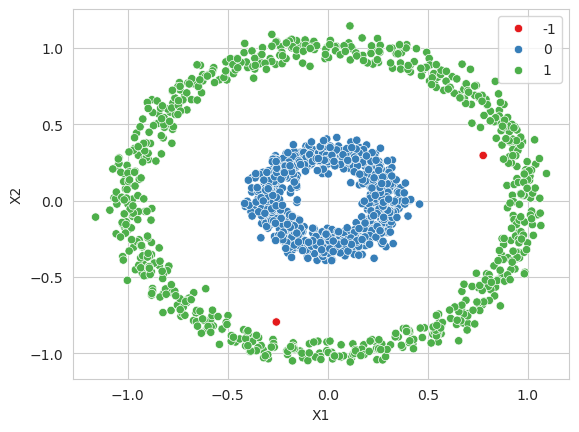

In [173]:
model = DBSCAN(eps=0.1)
display_categories(model,circles)

### Example 03 - DBSCAN optimal hyperparameters selection

In [174]:
two_blobs = pd.read_csv('./data/cluster-two-blobs.csv')
two_blobs_outliers = pd.read_csv('./data/cluster-two-blobs-outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

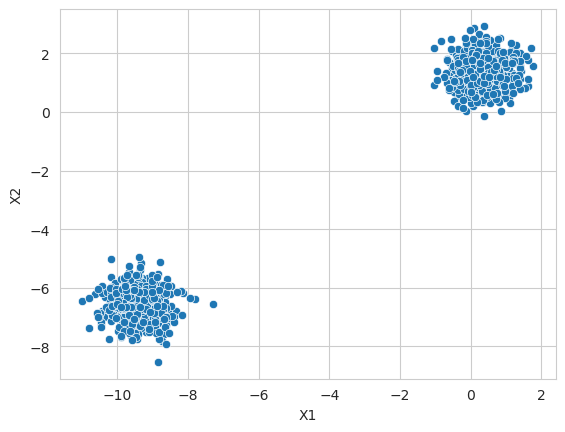

In [175]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

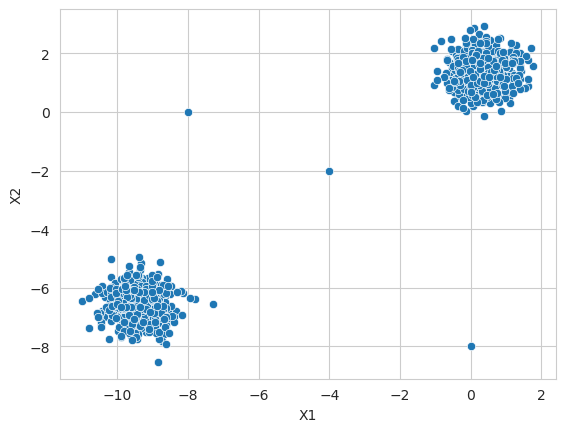

In [176]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

#### Epislon range

In [177]:
dbscan_def = DBSCAN()
dbscan_001 = DBSCAN(eps=0.001)
dbscan_10 = DBSCAN(eps=10)
dbscan_1 = DBSCAN(eps=1)
dbscan_075 = DBSCAN(eps=0.75)

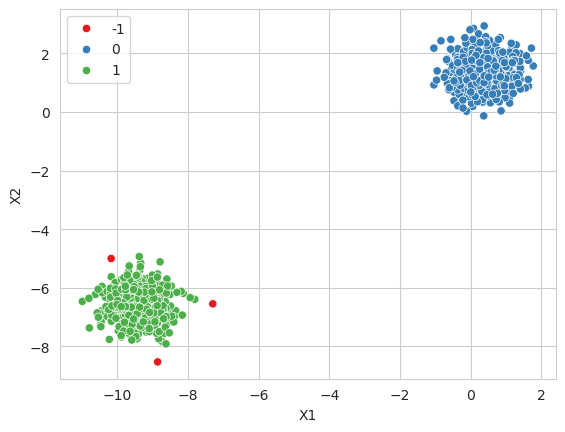

In [178]:
display_categories(dbscan_def,two_blobs)

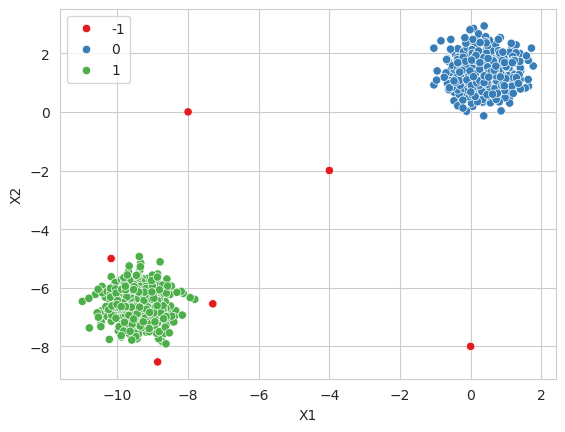

In [179]:
display_categories(dbscan_def,two_blobs_outliers)

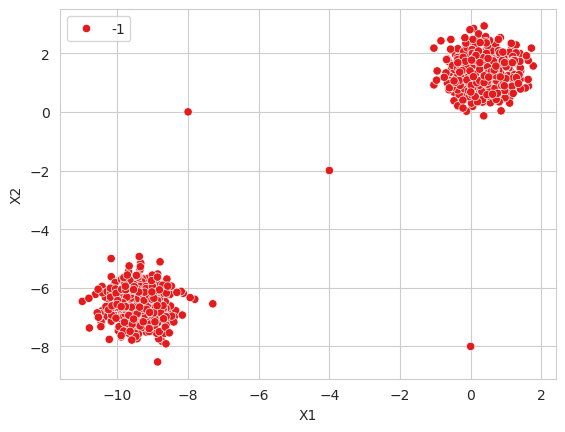

In [180]:
display_categories(dbscan_001,two_blobs_outliers)

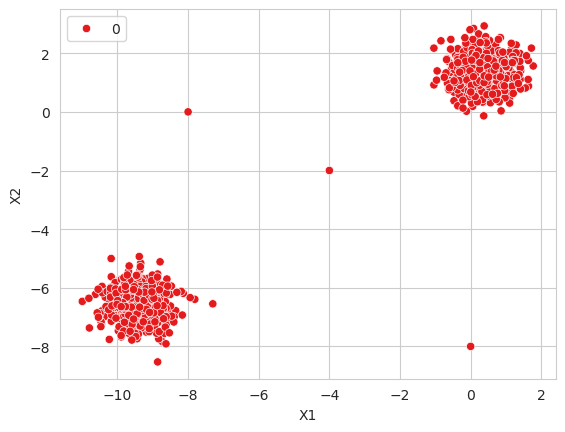

In [181]:
display_categories(dbscan_10,two_blobs_outliers)

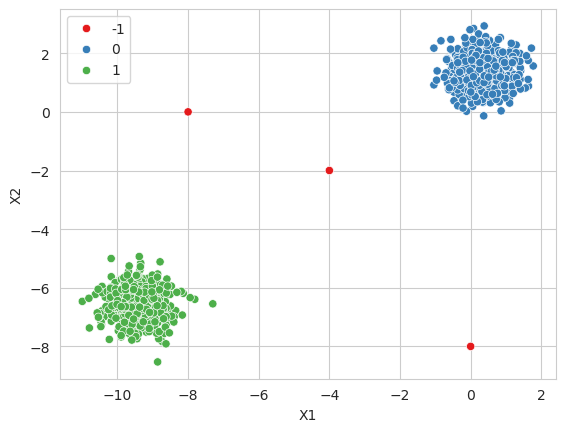

In [182]:
display_categories(dbscan_1,two_blobs_outliers)

In [183]:
def noise_sum_func(model,data):
    labels = model.fit_predict(data)
    return (labels == -1).sum()

In [184]:
noise_sum_func(dbscan_1,two_blobs_outliers)

np.int64(3)

In [185]:
def noise_percent_func(model,data):
    labels = model.fit_predict(data)
    return 100 * np.sum(labels == -1) / len(labels)

In [186]:
noise_percent_func(dbscan_1,two_blobs_outliers)

np.float64(0.29910269192422734)

In [187]:
def noise_metrics(model, data):
    labels = model.fit_predict(data)
    noise_sum = (labels == -1).sum()
    noise_percent = 100 * noise_sum / len(labels)
    return noise_sum, noise_percent

def dbscan_eps_range(data, eps_range):
    noise_percent_list = []
    noise_sum_list = []

    for eps in eps_range:
        dbscan = DBSCAN(eps=eps)
        noise_sum, noise_percent = noise_metrics(dbscan, data)
        noise_percent_list.append(noise_percent)
        noise_sum_list.append(noise_sum)

    return noise_sum_list, noise_percent_list

Text(0, 0.5, 'Noise Points Total')

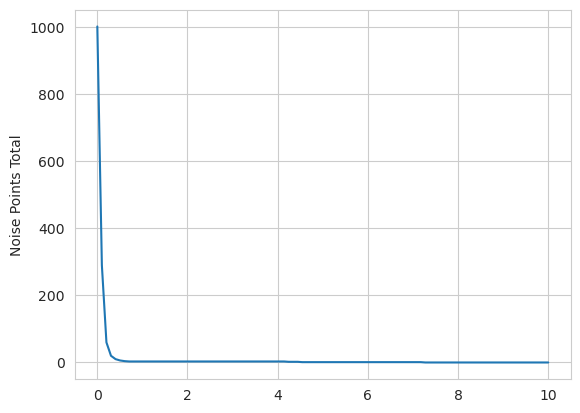

In [188]:
eps_range = np.linspace(0.001,10,100)
noise_sum_list, noise_percent_list = dbscan_eps_range(two_blobs_outliers,eps_range)
sns.lineplot(x=eps_range,y=noise_sum_list)
plt.ylabel('Noise Points Total')

Text(0, 0.5, 'Noise Points Total')

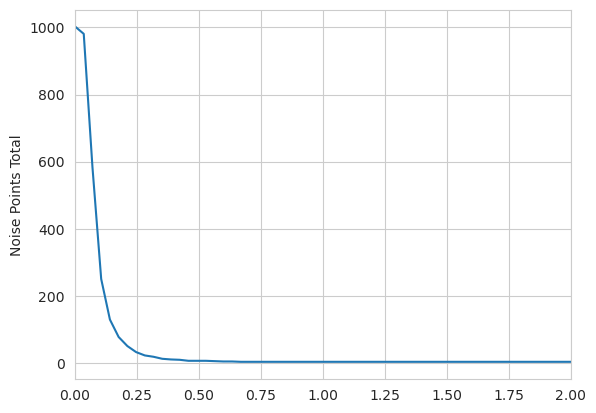

In [189]:
eps_range = np.linspace(0.001,7,200)
noise_sum_list, noise_percent_list = dbscan_eps_range(two_blobs_outliers,eps_range)
sns.lineplot(x=eps_range,y=noise_sum_list)
plt.xlim(0,2)
plt.ylabel('Noise Points Total')

Text(0, 0.5, 'Noise Points %')

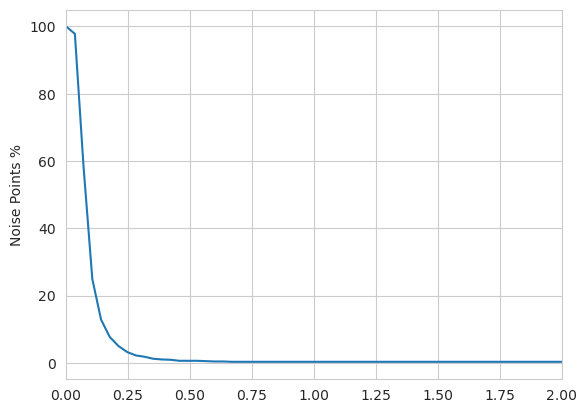

In [190]:
eps_range = np.linspace(0.001,7,200)
noise_sum_list, noise_percent_list = dbscan_eps_range(two_blobs_outliers,eps_range)
sns.lineplot(x=eps_range,y=noise_percent_list)
plt.xlim(0,2)
plt.ylabel('Noise Points %')

Text(0, 0.5, 'Noise Points Total')

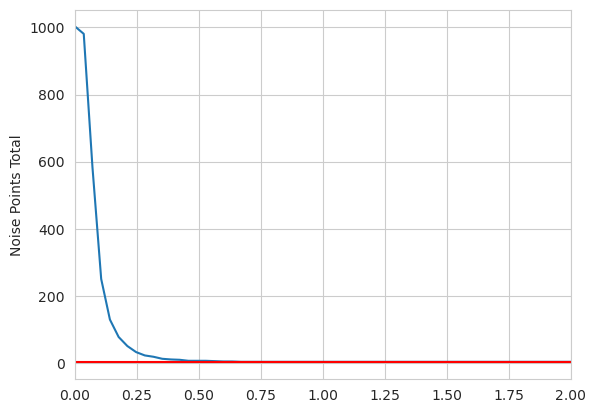

In [191]:
eps_range = np.linspace(0.001,7,200)
noise_sum_list, noise_percent_list = dbscan_eps_range(two_blobs_outliers,eps_range)
sns.lineplot(x=eps_range,y=noise_sum_list)
plt.xlim(0,2)
plt.hlines(y=noise_sum_func(dbscan_1,two_blobs_outliers),xmin=0,xmax=2,color='red')
plt.ylabel('Noise Points Total')

Text(0, 0.5, 'Noise Points Total')

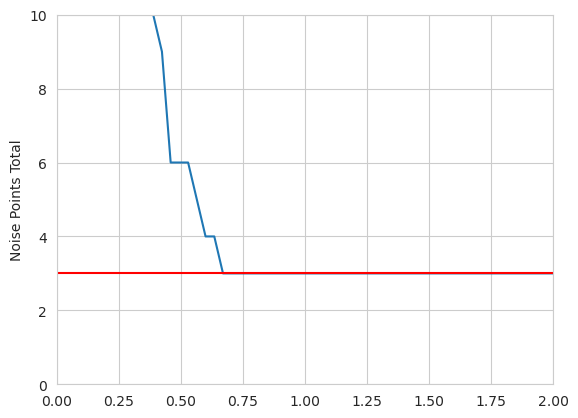

In [192]:
eps_range = np.linspace(0.001,7,200)
noise_sum_list, noise_percent_list = dbscan_eps_range(two_blobs_outliers,eps_range)
sns.lineplot(x=eps_range,y=noise_sum_list)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=noise_sum_func(dbscan_1,two_blobs_outliers),xmin=0,xmax=2,color='red')
plt.ylabel('Noise Points Total')

In [193]:
noise_sum_func(dbscan_075,two_blobs_outliers)

np.int64(3)

In [194]:
noise_percent_func(dbscan_075,two_blobs_outliers)

np.float64(0.29910269192422734)

##### Finding where 1% noise is reached

Text(0, 0.5, 'Noise Percent Total')

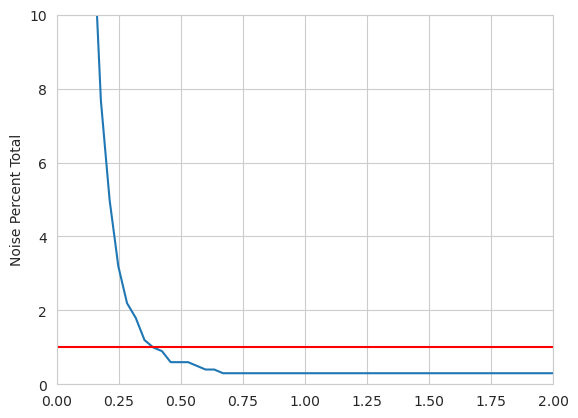

In [195]:

eps_range = np.linspace(0.001,7,200)
noise_sum_list, noise_percent_list = dbscan_eps_range(two_blobs_outliers,eps_range)
sns.lineplot(x=eps_range,y=noise_percent_list)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=1,xmin=0,xmax=2,color='red')
plt.ylabel('Noise Percent Total')

Text(0, 0.5, 'Noise Percent Total')

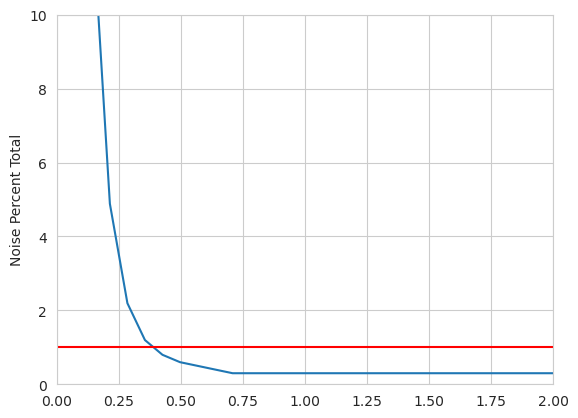

In [196]:
eps_range = np.linspace(0.001,7,100)
noise_sum_list, noise_percent_list = dbscan_eps_range(two_blobs_outliers,eps_range)
sns.lineplot(x=eps_range,y=noise_percent_list)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=1,xmin=0,xmax=2,color='red')
plt.ylabel('Noise Percent Total')

In [197]:
def dbscan_minpts_range(data, minpts_range):
    noise_minpts_perc_list = []
    noise_minpts_sum_list = []

    for n in minpts_range:
        dbscan = DBSCAN(min_samples=n)
        noise_sum, noise_percent = noise_metrics(dbscan, data)
        noise_minpts_perc_list.append(noise_percent)
        noise_minpts_sum_list.append(noise_sum)

    return noise_minpts_sum_list, noise_minpts_perc_list

In [198]:
minpts_range = np.arange(1,100)
noise_minpts_sum_list , noise_minpts_perc_list = dbscan_minpts_range(two_blobs_outliers,minpts_range)

Text(0, 0.5, 'Noise Points %')

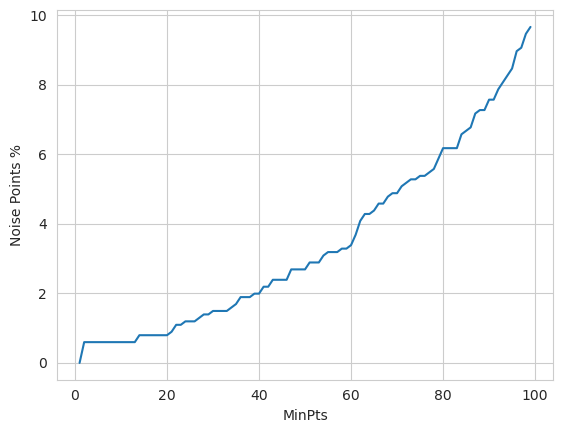

In [199]:
sns.lineplot(x=minpts_range,y=noise_minpts_perc_list)
plt.xlabel('MinPts')
plt.ylabel('Noise Points %')

In [200]:
dbsamp_1 = DBSCAN(min_samples=1)

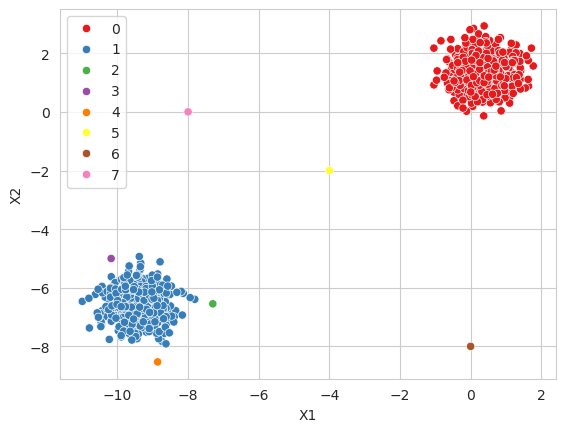

In [201]:
display_categories(dbsamp_1,two_blobs_outliers)

In [202]:
num_dim = two_blobs_outliers.shape[1]
dbmix_s2_e075 = DBSCAN(min_samples=2,eps=0.75)
dbmix_sdim_e075 = DBSCAN(min_samples=2*num_dim,eps=0.75)

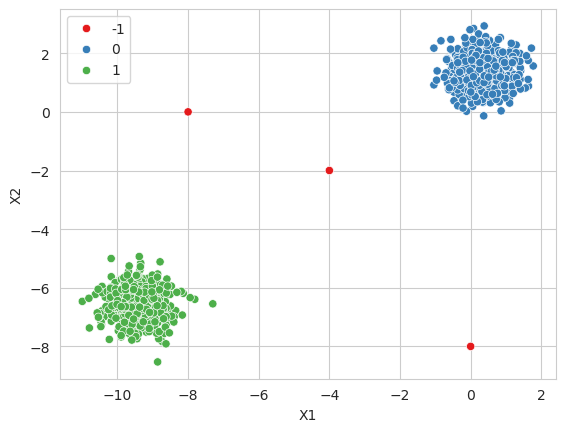

In [203]:
display_categories(dbmix_s2_e075,two_blobs_outliers)

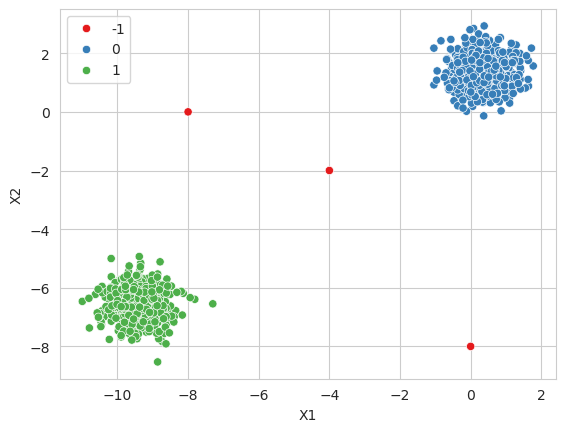

In [204]:
display_categories(dbmix_sdim_e075,two_blobs_outliers)

### Example 04 - DBSCAN

In [206]:
df = pd.read_csv('./data/wholesome-customers-data.csv')

In [207]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='Milk', ylabel='Grocery'>

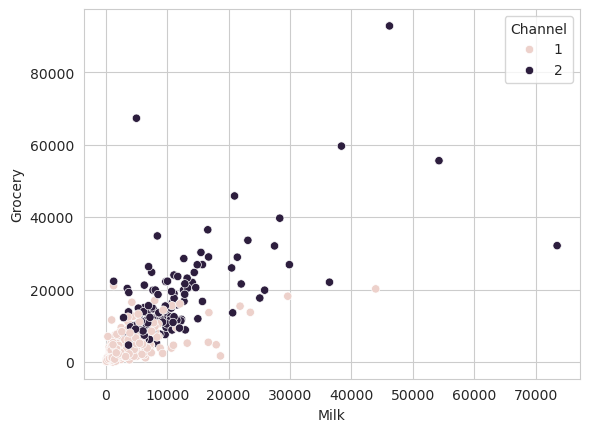

In [209]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

<Axes: xlabel='Milk', ylabel='Count'>

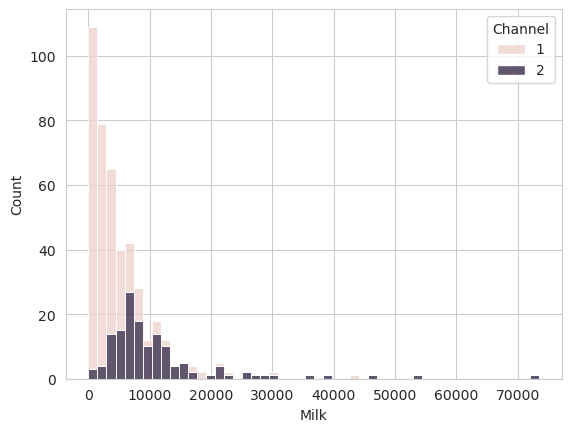

In [210]:
sns.histplot(data=df,x='Milk',hue='Channel',multiple='stack')

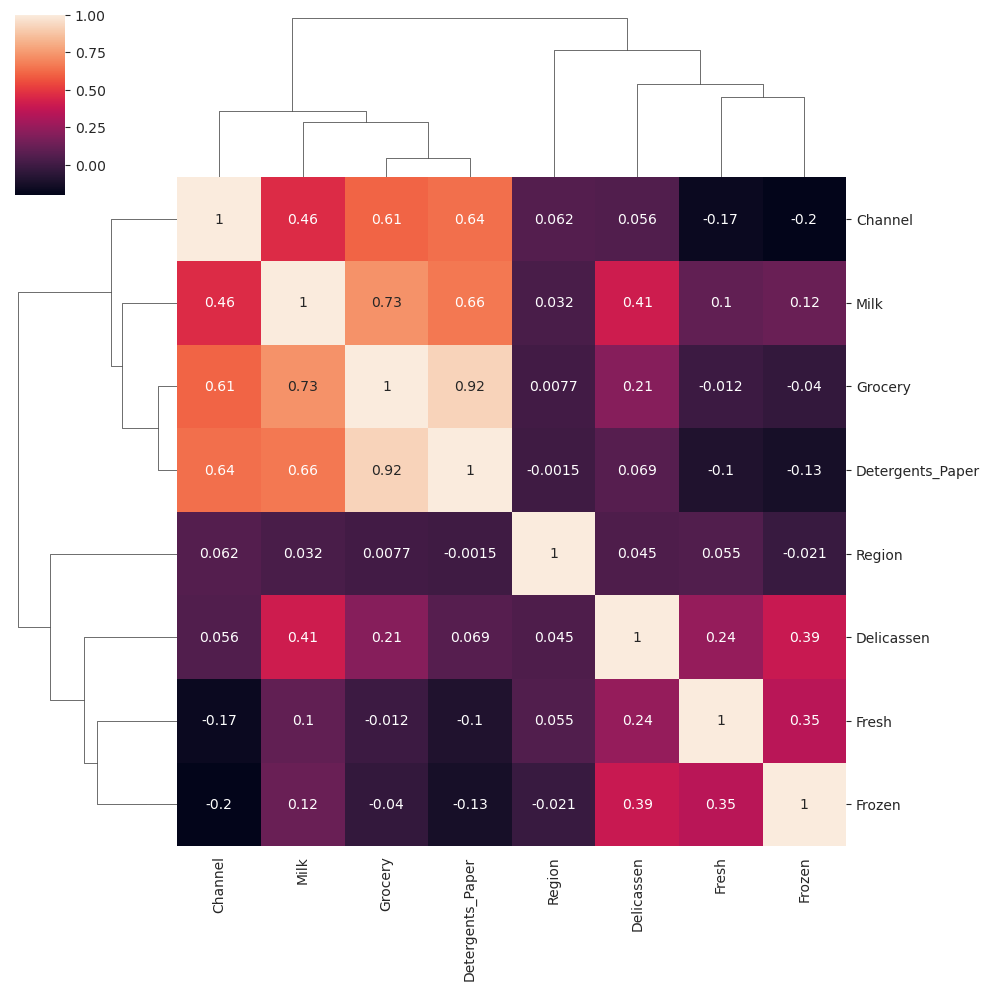

In [211]:
sns.clustermap(df.corr(),annot=True)

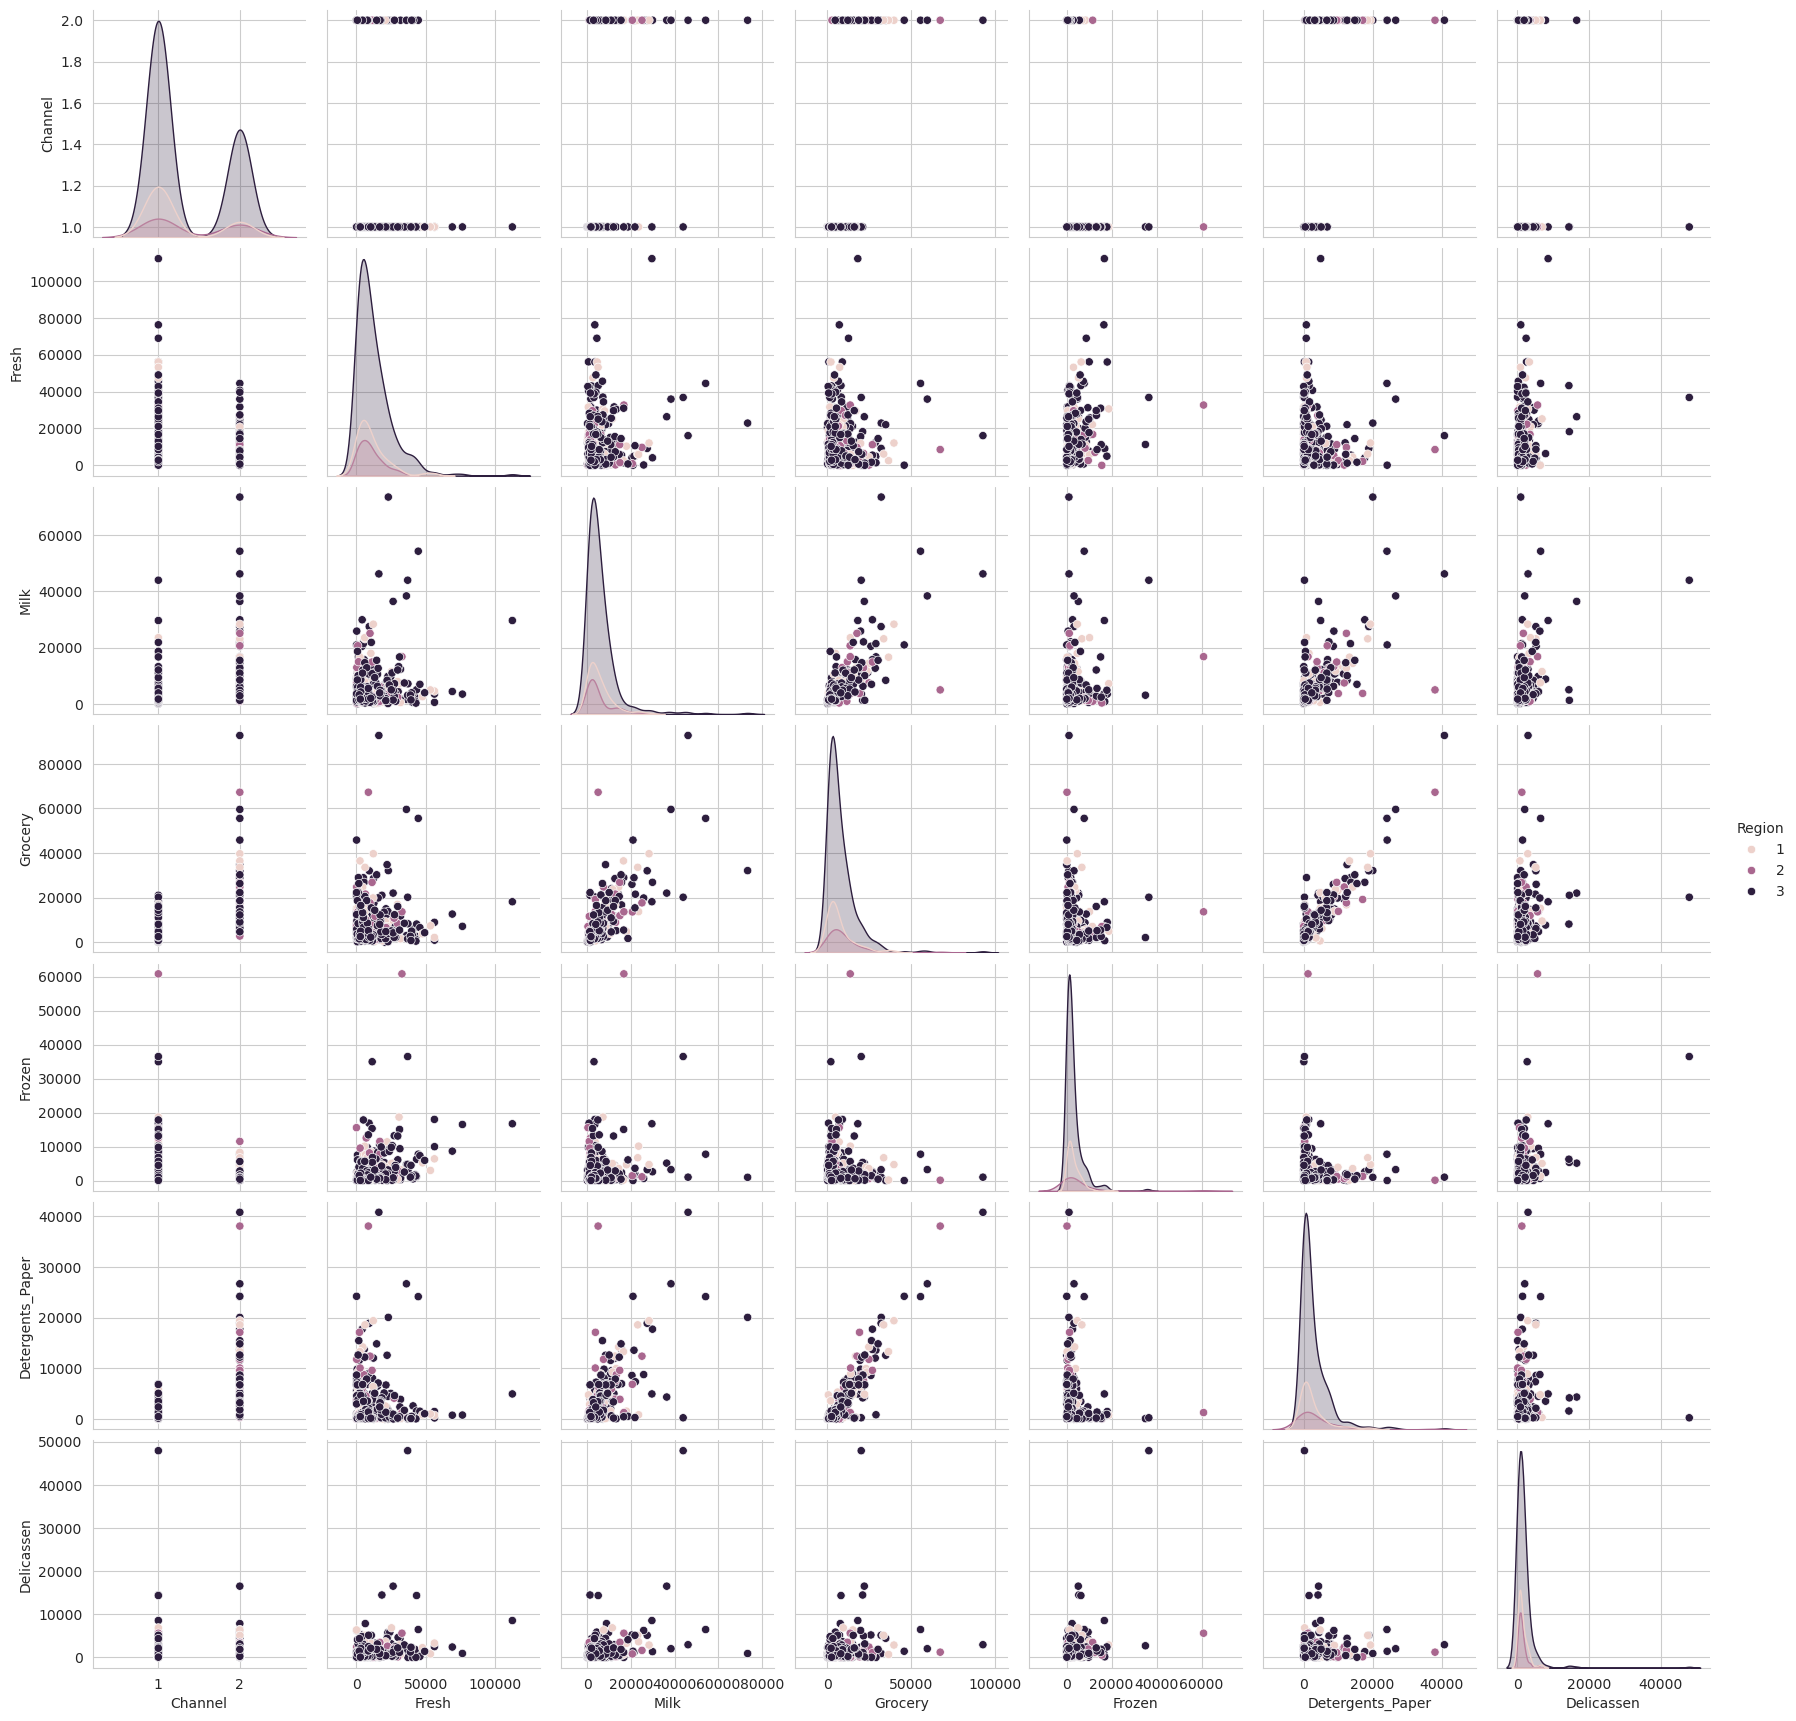

In [212]:
sns.pairplot(data=df,hue='Region')

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
X_scaled = StandardScaler().fit_transform(df)

In [215]:
X_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]], shape=(440, 8))

In [216]:
wholesome_noise_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*X_scaled.shape[1])
    dbscan.fit(X_scaled)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    wholesome_noise_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

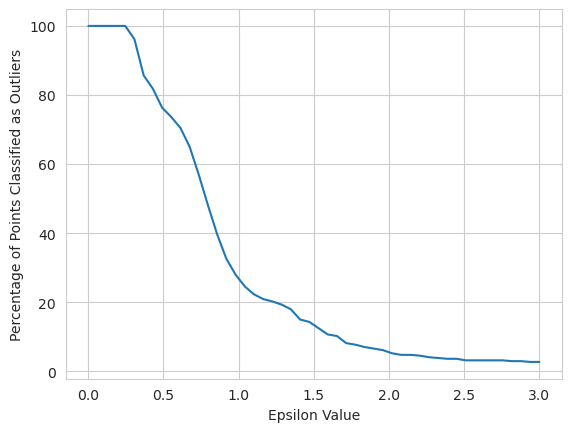

In [217]:
sns.lineplot(x=np.linspace(0.001,3,50),y=wholesome_noise_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [218]:
dbscanw = DBSCAN(eps=2)
dbscanw.fit(X_scaled)

DBSCAN(eps=2)

<Axes: xlabel='Milk', ylabel='Grocery'>

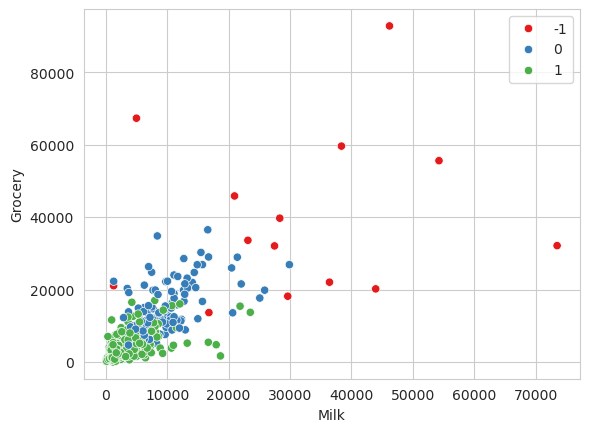

In [240]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue=dbscanw.labels_,palette='Set1')

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

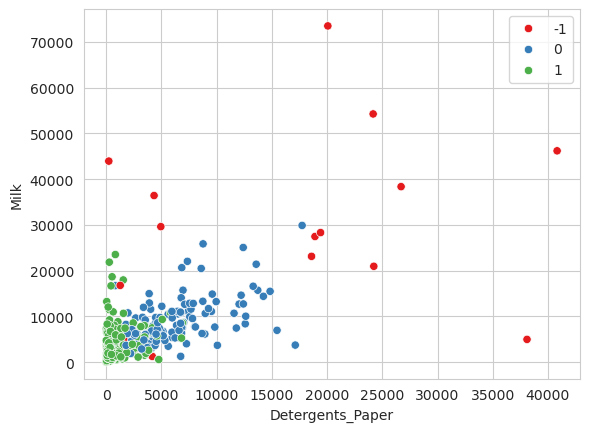

In [241]:
sns.scatterplot(data=df,x='Detergents_Paper', y='Milk', hue=dbscanw.labels_,palette='Set1')

In [221]:
df['Labels'] = dbscanw.labels_

In [222]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [223]:
categs = df.drop(['Channel','Region'],axis=1)
categs_means = categs.groupby('Labels').mean()
categs_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


In [225]:
from sklearn.preprocessing import MinMaxScaler

In [227]:
scaled_means = MinMaxScaler().fit_transform(categs_means)

In [228]:
scaled_means

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.23929169, 0.34101071, 0.        , 0.38075797,
        0.05993767],
       [0.20318831, 0.        , 0.        , 0.1567934 , 0.        ,
        0.        ]])

<Axes: >

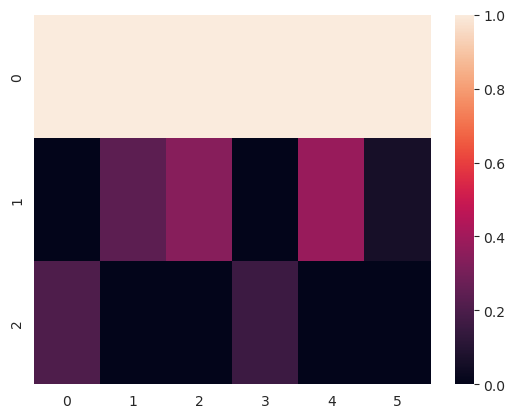

In [234]:
sns.heatmap(scaled_means)

<Axes: ylabel='Labels'>

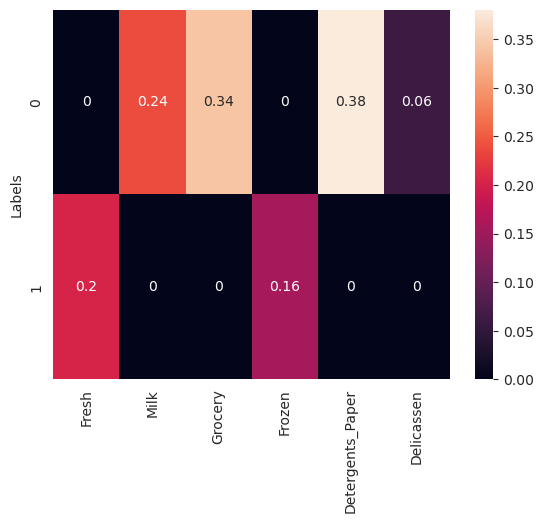

In [239]:
scaled_means_df = pd.DataFrame(scaled_means, index=categs_means.index, columns=categs_means.columns)
sns.heatmap(scaled_means_df.loc[[0,1]],annot=True)